# Agriculture Dataset

#### We need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

In [38]:
#reading csv file
import pandas as pd
import numpy as np
df_train=pd.read_csv("train_agriculture.csv",sep="	")
df_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [39]:
#viewing the columns in dataset
df_train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [40]:
#dimensions of data
df_train.shape

(4599, 10)

There are 4599 rows and 10 columns 

Crop_Damage is our target variable

In [41]:
#checking for null valules
df_train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

"Number_Weeks_Used" has 442 null values 

Rest of the data does not contain any NaN values



In [42]:
#replacing the NaN values with mean
df_train["Number_Weeks_Used"]=df_train["Number_Weeks_Used"].fillna(df_train["Number_Weeks_Used"]).mean()

In [43]:
#check if the NaN values are replaced
df_train.isnull().any()

ID                         False
Estimated_Insects_Count    False
Crop_Type                  False
Soil_Type                  False
Pesticide_Use_Category     False
Number_Doses_Week          False
Number_Weeks_Used          False
Number_Weeks_Quit          False
Season                     False
Crop_Damage                False
dtype: bool

In [44]:
#checking the data type of our dataset
df_train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

Only the ID column has object data type 

Number of weeks used is in float ,rest of the data are in int format

In [45]:
#checking the unique values in each column
df_train.nunique()

ID                         4599
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used             1
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
dtype: int64

In [46]:
#types of crop
df_train["Crop_Type"].value_counts()

0    3565
1    1034
Name: Crop_Type, dtype: int64

There are 2 types of crops represented by 0 and 1

In [47]:
#types of soil
df_train["Soil_Type"].value_counts()

0    2407
1    2192
Name: Soil_Type, dtype: int64

There are 2 types of soils represented by 0 and 1 

Type 0 soils has 2407 records while type 1 soil has 2192 records in the dataset

In [48]:
#types of pesticide used
df_train["Pesticide_Use_Category"].value_counts()

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

There are 3 types of pesticides represented by 1,2 and 3

Type 1 pesticide has been used fo r45 times ,Type 2 for 3205 times while type 3 pesticide has been used for 1349 times

In [49]:
#Seasons
df_train["Season"].value_counts()

2    2327
1    1379
3     893
Name: Season, dtype: int64

There are 3 types of seasons represented by 1,2 and 3

Type 1 season has 1379 records while type 2 season has 2327 records in the dataset and type 3 season had 893 records

In [50]:
#conditon of crop
df_train["Crop_Damage"].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

Crop Damage Category 

(0=alive,there are 3820 alive crops
 
 1=Damage due to other causes,664 crops are damaged due to other causes
 
 2=Damage due to Pesticides,there are 115 crop that are damaged)

# visualizations

In [51]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

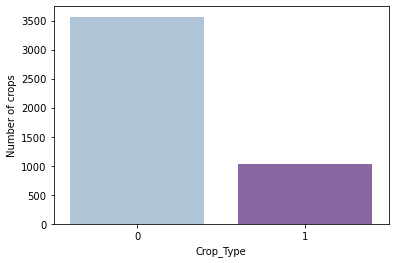

In [52]:
sns.countplot(df_train["Crop_Type"],palette='BuPu')
plt.ylabel("Number of crops")
plt.show()

Maximum number of crops belong to type 0 

1034 crops were of type 1

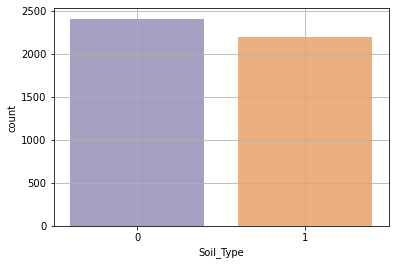

In [53]:
sns.countplot(df_train["Soil_Type"],palette= 'tab20c_r')
plt.grid()
plt.show()

Most number of crops were grown in Type 0 soil 

2190 crops were grown in Type 1 soil

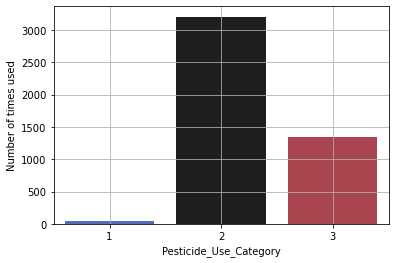

In [54]:
sns.countplot(df_train["Pesticide_Use_Category"],palette='icefire')
plt.ylabel("Number of times used")
plt.grid()
plt.show()

Type 1 pesticides were used the least approximately 45 times

Type 2 Pesticides are used most frequently i.e 3205 times

Type 3 pesticide is used moderately

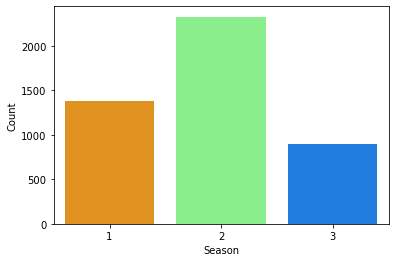

In [55]:
sns.countplot(df_train["Season"],palette='jet_r')
plt.ylabel("Count")
plt.show()

Type 2 season is observed most of the time , 2327 records were taken during this season

Type 3 season is observed less among the all,only 893 records were taken during this season

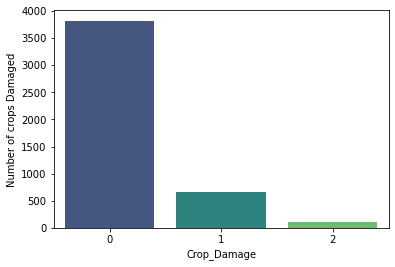

In [56]:
sns.countplot(df_train["Crop_Damage"],palette= 'viridis')
plt.ylabel("Number of crops Damaged")
plt.show()

Most of the crops were alive they are 3820 in number 

664 crops are damaged due to other factors

few(115)crops are damaged due to the use of pesticides


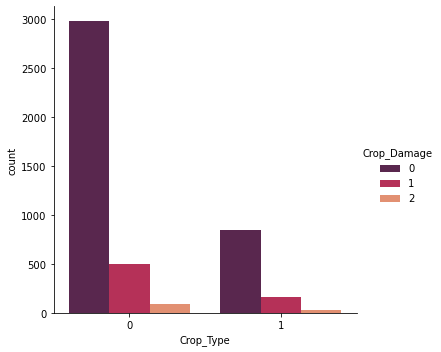

In [57]:
#checking which crop type was damaged in which way
sns.catplot(x="Crop_Type", kind="count",hue="Crop_Damage",palette='rocket', data=df_train)
plt.show()

Most of the crops of Type 0 were alive as compared to Type 1

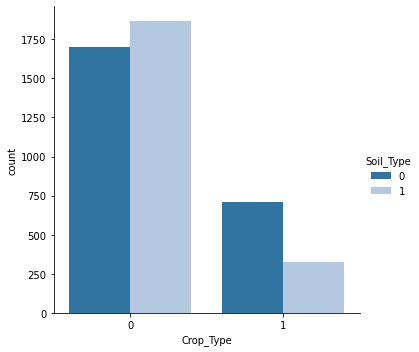

In [58]:
sns.catplot(x="Crop_Type",kind="count",hue="Soil_Type",palette='tab20',data=df_train)
plt.show()

Most of the crop type 0 were grown in soil type 1

comparatively less crops were grown in soil type 0

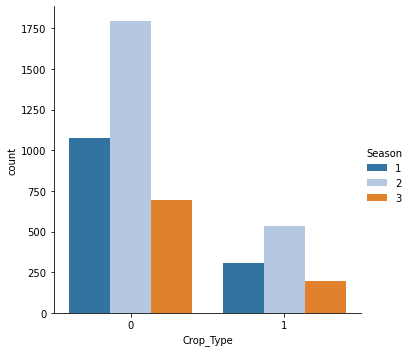

In [59]:
sns.catplot(x="Crop_Type",kind="count",hue="Season",palette='tab20',data=df_train)
plt.show()

Most of the crops were grown in season 2

Less crops were grown in season 3

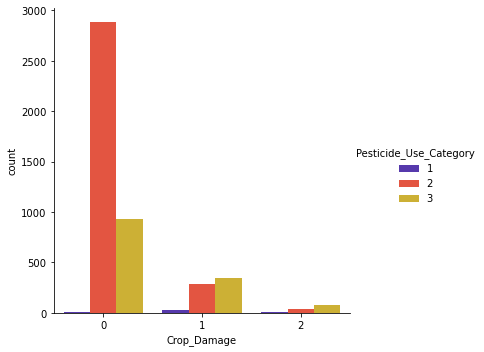

In [60]:
sns.catplot(x="Crop_Damage",kind="count",hue="Pesticide_Use_Category",palette='CMRmap',data=df_train)
plt.show()

when pesticide 2 was used most of the crops were alive 

pesticide 3 resulted in damaged crops 

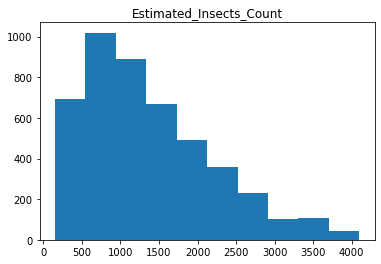

In [61]:
plt.hist(df_train['Estimated_Insects_Count'])
plt.title('Estimated_Insects_Count')
plt.show()

Maximum frequency of insects is 1132

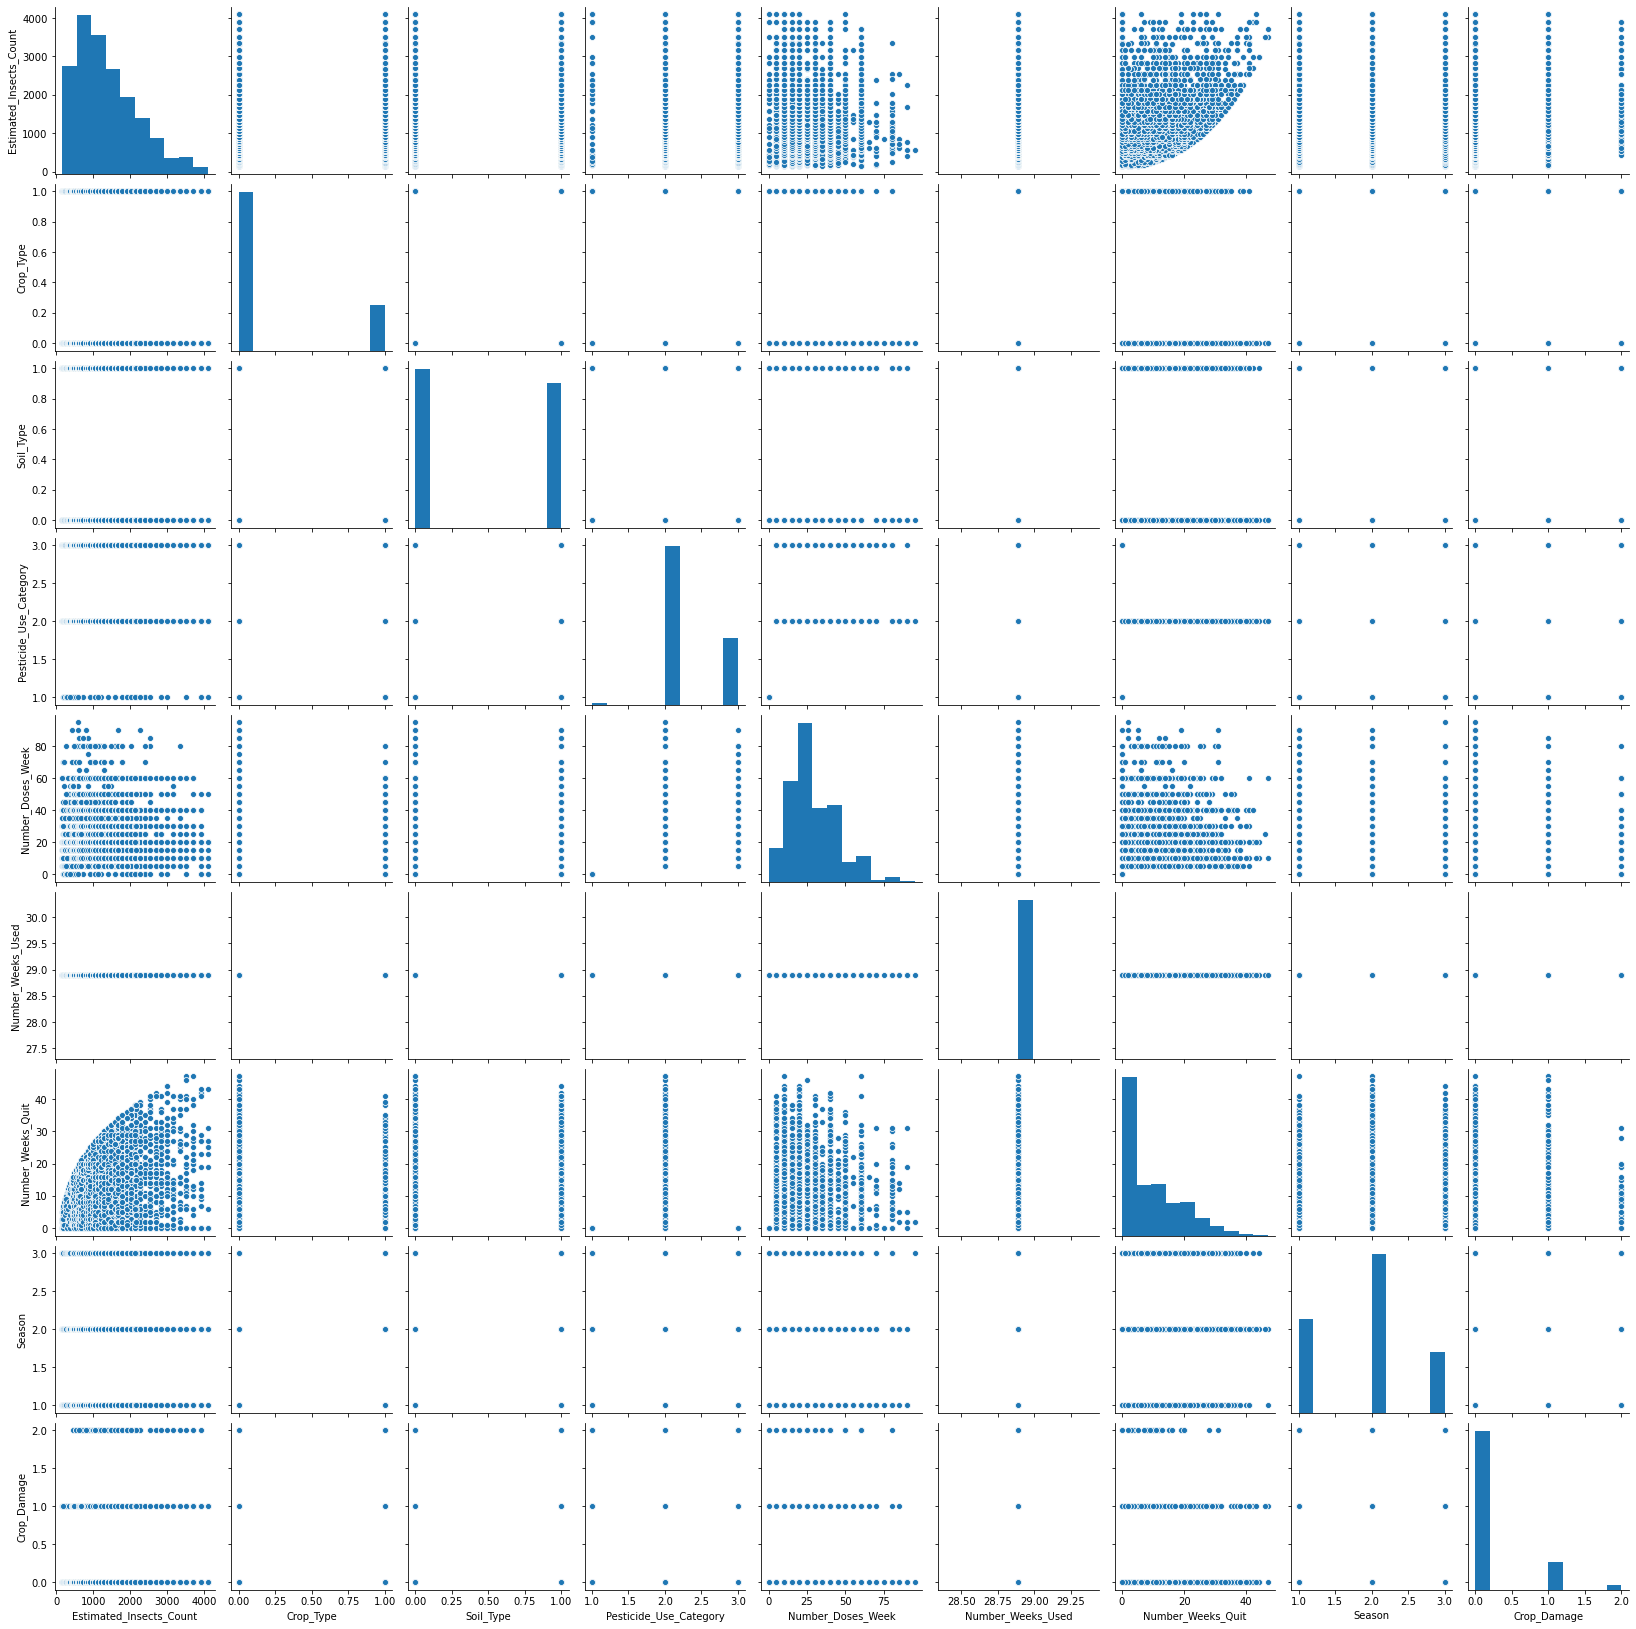

In [62]:
#checking relationship of each variable
sns.pairplot(df_train)
plt.show()

#### Box Plot

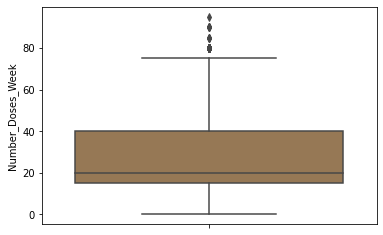

In [63]:
sns.boxplot(df_train['Number_Doses_Week'],orient='v',palette='cubehelix')
plt.show()

There are outliers present 

minimum=0

maximum=95

median=20

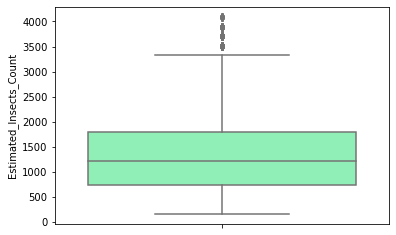

In [64]:
sns.boxplot(df_train['Estimated_Insects_Count'],palette= 'rainbow',orient='v')
plt.show()

Outliers are present

min=150.000000

25%=731.000000

50%=1212.000000

75%=1786.000000

max=4097.000000

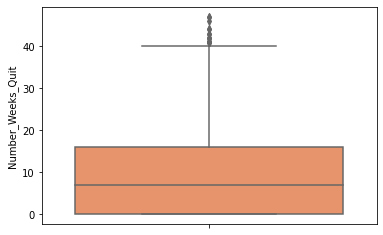

In [65]:
sns.boxplot(df_train['Number_Weeks_Quit'],palette= 'OrRd',orient='v')
plt.show()

As there are values beyound 75th percentile we can see certain outliers

min=0.000000

25% =0.000000

50%=7.000000

75%=16.000000

max =47.000000

As we can see the "ID" and "Number_weeks_used" do not affect the target we can drop it

In [66]:
df_train.drop(["ID","Number_Weeks_Used"],axis=1,inplace=True)
df_train.sample()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Crop_Damage
3808,2267,0,0,2,30,6,2,0


# Statistical Analysis

In [68]:
#finding correlation of variables with target
df_train.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,-0.032381,-0.003768,-0.018363
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,-0.152918,-0.016196,1.000000


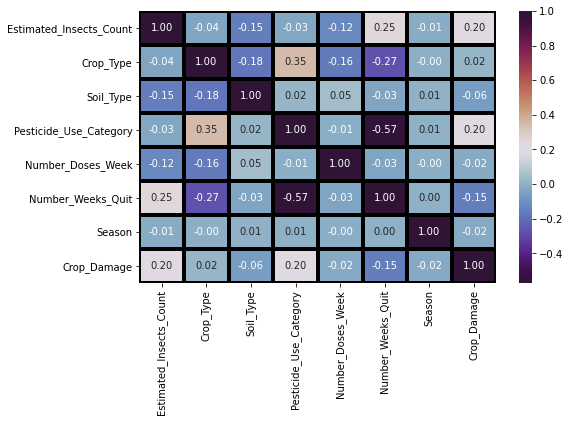

In [69]:
#plotting the correlation
plt.figure(figsize=(8,5))
sns.heatmap(df_train.corr(),annot=True,fmt=".2f",linewidth=3,linecolor='black',cmap= 'twilight_shifted')
plt.show()

#### observations

"Estimated_Insects_Count"  and "Pesticide_use_category" has the hightest positive correlation of 0.20 with target variable.


"Soil_type" has the least correlation which is -0.06

"crop_types" has the least positive correlation

"Number_doses_week" and "season" has correlation of -0.02

In [71]:
#statistical summary
df_train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,47.000000,3.000000,2.000000


#### Observations

"Estimated_Insects_count", "Number_Does_week" and "Number_weeks_quit" have very high standard deviation

for rest of the columns the mean and median are almost similar

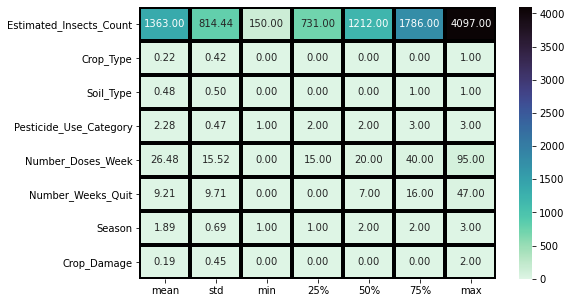

In [72]:
#plotting the summary
plt.figure(figsize=(8,5))
sns.heatmap(df_train.describe()[1:].transpose(),annot=True,fmt=".2f",linewidth=3,linecolor='black',cmap= 'mako_r')
plt.show()

#### observations

1)Estimated_Insects_count

    mean=1363.00

    standard deviation=814.44

    min=150.00

    max=4097

2)Crop_TYpe:
    
    mean=0.22483

    std_dev=0.417517

    min=0.00000

    max=1.00000

3)soil_Type:
    
    mean=0.476625

    std_dev=0.499508

    min=0.00000

    max=1.00000

4)pesticide_use_category

    mean=2.28

    min=1.00

    max=3.00

    std=0.47

5)Number_doses_Week:
    
    mean=26.48

    std=15.52

    min=0

    max=95

6)Number_Weeks_Quit:
    
    mean=9.21

    std=9.71

    min=0

    max=47

7)Season:
    
    mean=1.89

    std=0.69

    min=1.00

    max=3.00

8)Crop_Damage:
    
    mean=0.19

    std=0.45

    min=0

    max=2

# outlier detection using zscores

In [73]:
from scipy.stats import zscore
z=np.abs(zscore(df_train))
z

array([[1.44286807, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.41708065, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.35813798, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [74]:
#finding where zscores are greater than 3
threshold=3
print(np.where(z>3))

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  377,  384,  453,  458,  466,  480,  510,  517,  522,  557,
        595,  612,  634,  693,  702,  703,  704,  705,  706,  807,  819,
        855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067, 1097,
       1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339, 1340,
       1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349, 1406,
       1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868, 2019,
       2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183, 2185,
       2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553, 2565,
       2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702, 2710,
       2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806, 2814,
       2828, 2829, 2834, 2841, 2842, 2851, 2860, 2

In [75]:
df_train_new=df_train[((z<3).all(axis=1))]
print("original shape=",df_train.shape)
print("new shape without outliers=",df_train_new.shape)

original shape= (4599, 8)
new shape without outliers= (4376, 8)


In [76]:
#percentage loss
print("percentage loss=",((4599-4376)/4599)*100)

percentage loss= 4.848880191345945


In [77]:
df_train.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

For numeric columns the skew is not very high, Crop damage is our target so we should not treat it

#### Data split

In [78]:
#assigning features and target
x=df_train.drop(["Crop_Damage"],axis=1)
x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season
0,188,1,0,1,0,0,1
1,209,1,0,1,0,0,2
2,257,1,0,1,0,0,2
3,257,1,1,1,0,0,2
4,342,1,0,1,0,0,2


In [79]:
y=df_train["Crop_Damage"]
y.sample()

1964    0
Name: Crop_Damage, dtype: int64

#### Standard Scaler

In [80]:
#standard scaler using loop
from sklearn.preprocessing import StandardScaler
scales=['Estimated_Insects_Count','Number_Doses_Week',"Number_Weeks_Quit"]
sc=StandardScaler()
for i in scales:
    x[i]=sc.fit_transform(x[[i]]) #passing a 2d array

# Selecting the best random state

In [81]:
#importing required libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [82]:
accu=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)  
    temp_acc=accuracy_score(y_test,y_pred)
    if temp_acc>accu:
        accu=temp_acc
        best_random_state=i
    
print('Best accuracy is ',(accu*100),'found on random state',(best_random_state)) 
print("cross validation score is ",cross_val_score(knn,x,y,cv=5).mean()*100)
        

Best accuracy is  84.43478260869566 found on random state 1
cross validation score is  79.86542555708


In [83]:
#using the best random state found to split the data for test and train 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
print("train size=",x_train.shape," ","test size=",x_test.shape)


train size= (3449, 7)   test size= (1150, 7)


In [84]:
#using the best random state to evaluate various models
#finding the best model

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#boosting models

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [85]:
#comparing various models to select the best one
models=[DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),
       BaggingClassifier(),ExtraTreesClassifier()]
for i in models:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    y_pred=i.predict(x_test)
    print("accuracy score of ",i,"=",accuracy_score(y_test,y_pred)*100)
    print("cross validation score =",cross_val_score(i,x,y,cv=5).mean()*100)
    print(("difference=",(accuracy_score(y_test,y_pred)*100)-(cross_val_score(i,x,y,cv=5).mean()*100)))
    print("\n")


accuracy score of  DecisionTreeClassifier() = 77.56521739130436
cross validation score = 70.77669489520746
('difference=', 6.2883569096844525)


accuracy score of  KNeighborsClassifier() = 84.43478260869566
cross validation score = 79.86542555708
('difference=', 4.569357051615654)


accuracy score of  GaussianNB() = 84.43478260869566
cross validation score = 77.23560580971755
('difference=', 7.199176798978101)


accuracy score of  SVC() = 85.73913043478261
cross validation score = 83.17024648720255
('difference=', 2.568883947580062)


accuracy score of  RandomForestClassifier() = 83.1304347826087
cross validation score = 78.66982069357051
('difference=', 4.5041633155130825)


accuracy score of  AdaBoostClassifier() = 85.3913043478261
cross validation score = 82.93111605241992
('difference=', 2.4601882954061693)


accuracy score of  GradientBoostingClassifier() = 85.65217391304348
cross validation score = 82.30035009698632
('difference=', 3.3518238160571627)


accuracy score of  Bagging

#### svc,adaboost, and gradient boost are the algorithms which shows good accuracy and a minimal difference between scores and cross valildations

# SVC

In [86]:
#hypertuning for svc
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={"kernel":["linear","poly","rbf","sigmoid"],"gamma":["scale","auto"],"random_state":[10,20,33,42]}
                      
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'gamma': 'auto', 'kernel': 'rbf', 'random_state': 10}


In [87]:
#using the best parameter obtained above
svc=SVC(kernel='rbf',random_state=10,gamma="auto")
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
svc_score=accuracy_score(y_test,y_pred)*100
print("accuracy",svc_score)
svc_crossval=cross_val_score(svc,x,y,cv=5).mean()*100
print("cross_validation score=",svc_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 86.17391304347825
cross_validation score= 83.4745943132895


confusion matrix 
 [[982   1   0]
 [134   9   0]
 [ 24   0   0]]


classification report
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       983
           1       0.90      0.06      0.12       143
           2       0.00      0.00      0.00        24

    accuracy                           0.86      1150
   macro avg       0.59      0.35      0.35      1150
weighted avg       0.85      0.86      0.81      1150



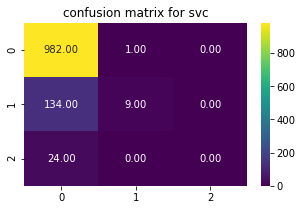

In [88]:
#confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="viridis",fmt="0.2f")
plt.title("confusion matrix for svc")
plt.show()

#### Observations

982 represents the number of predictions which were correctly classified [as a 0]. This is also the True Positive for the 0 class

1 is the number of predictions where 0 were incorrectly classified as  1.

for class 1 the correct predictions were only 9

for class 2 none of the predictions were correct, 24 of them were falsely classified as class 0


# AdaBoost

In [89]:
#hypertuning for adaboost
from sklearn.model_selection import GridSearchCV
abc=AdaBoostClassifier()
parameters={"n_estimators":[5,6,7,10,20,30],"algorithm":["SAMME",'SAMME.R'],"random_state":[10,20,33,42]}
                      
clf=GridSearchCV(abc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'SAMME.R', 'n_estimators': 5, 'random_state': 10}


In [90]:
#using the best parameter obtained above
abc=AdaBoostClassifier(algorithm='SAMME.R',random_state=10,n_estimators=5)
abc.fit(x_train,y_train)
y_pred=abc.predict(x_test)
abc_score=accuracy_score(y_test,y_pred)*100
print("accuracy",abc_score)
abc_crossval=cross_val_score(abc,x,y,cv=5).mean()*100
print("cross_validation score=",abc_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 85.47826086956522
cross_validation score= 83.3441595306808


confusion matrix 
 [[983   0   0]
 [143   0   0]
 [ 24   0   0]]


classification report
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       983
           1       0.00      0.00      0.00       143
           2       0.00      0.00      0.00        24

    accuracy                           0.85      1150
   macro avg       0.28      0.33      0.31      1150
weighted avg       0.73      0.85      0.79      1150



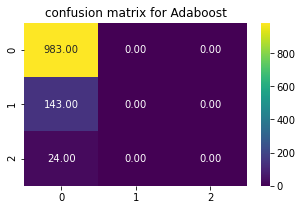

In [91]:
#confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="viridis",fmt="0.2f")
plt.title("confusion matrix for Adaboost")
plt.show()

#### observation

for class 0--->983 values are correctly predicted there are no errors

for class 1--->143 values are predicted as class 0 which are errors
    
for class 2 : 24 values are wrongly predicted as class 0

# Gradient boosting

In [92]:
#hypertuning for adaboost
from sklearn.model_selection import GridSearchCV
gb=GradientBoostingClassifier()
parameters={"n_estimators":[5,6,7,10,20,30],"criterion":["mae",'mse','friedman_mse'],"random_state":[10,20,33,42],
           'max_features':['auto','sqrt','log2'],'loss':['deviance','exponential']}
                      
clf=GridSearchCV(gb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'loss': 'deviance', 'max_features': 'sqrt', 'n_estimators': 20, 'random_state': 42}


In [93]:
#using the best parameter obtained above
gb=GradientBoostingClassifier(criterion="mse",random_state=42,n_estimators=20,max_features="sqrt",loss="deviance")
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
gb_score=accuracy_score(y_test,y_pred)*100
print("accuracy",gb_score)
gb_crossval=cross_val_score(gb,x,y,cv=5).mean()*100
print("cross_validation score=",gb_crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))


accuracy 86.26086956521739
cross_validation score= 83.56155083502863


confusion matrix 
 [[982   1   0]
 [133  10   0]
 [ 24   0   0]]


classification report
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       983
           1       0.91      0.07      0.13       143
           2       0.00      0.00      0.00        24

    accuracy                           0.86      1150
   macro avg       0.59      0.36      0.35      1150
weighted avg       0.85      0.86      0.81      1150



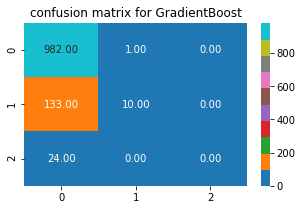

In [94]:
#confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='tab10',fmt="0.2f")
plt.title("confusion matrix for GradientBoost")
plt.show()

In [ ]:
for class 0:982 values are correctly predicted while 1 value is falsely predicted as class 1

for class 1:10 values are correctly predicted while there are 133 error which are predicted as class 0
    
for class 2 : 0 values are correctly predicted while 24 are wrongly predicted as class 0

# Saving the model:GradientBoost

In [95]:
import pickle
filename="agriculture_train.pkl"
pickle.dump(gb,open(filename,'wb'))

In [96]:
actual=np.array(y_test)
predicted=np.array(gb.predict(x_test))

In [97]:
df_com=pd.DataFrame({"actual values":actual,"predicted values":predicted})
df_com

,actual values,predicted values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1145,0,0
1146,0,0
1147,0,0
1148,0,0


# Working on Test Dataset

In [98]:
#reading the file
df_test=pd.read_csv("test_agriculture.csv",sep="	")
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [99]:
#checking the columns
df_test.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [100]:
#checking the dimensions
df_test.shape

(1199, 9)

In [101]:
#data type of dataset
df_test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [102]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [103]:
#checking the null values
df_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

#### performing the steps that were performed on train dataset

In [104]:
#dropping the columns that were dropped in train dataset
df_test.drop(["ID","Number_Weeks_Used"],axis=1,inplace=True)
df_test.sample()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season
697,1297,0,0,2,20,5,3


In [105]:
#standard scaler using loop
from sklearn.preprocessing import StandardScaler
scales=['Estimated_Insects_Count','Number_Doses_Week',"Number_Weeks_Quit"]
sc=StandardScaler()
for i in scales:
    df_test[i]=sc.fit_transform(df_test[[i]]) #passing a 2d array

In [106]:
df_test.sample()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season
1029,-0.784627,0,1,2,1.451911,-0.00593,2


In [107]:
fitted_model=pickle.load(open("agriculture_train.pkl","rb"))

In [108]:
#check the model
fitted_model

GradientBoostingClassifier(criterion='mse', max_features='sqrt',
                           n_estimators=20, random_state=42)

In [110]:
#predict using the saved model
predictions=fitted_model.predict(df_test)

In [111]:
#predicted values
predictions=pd.DataFrame(predictions)
predictions

,0
0,0
1,0
2,0
3,0
4,0
...,...
1194,0
1195,0
1196,0
1197,0


In [112]:
predictions[0].value_counts()

0    1195
1       4
Name: 0, dtype: int64

# Conclusion 

Thus i have hypertuned and checked the model performance using SVC, Adaboost and Gradient Boost classifier.

GradientBoosting Algorithm gives us best results and is used to model the train dataset .The trained model is saved

The model gives us accuracy of 86.6% and has a cross validation score of 83.56%

The saved model is then used to make predictions on the test data set 